In [64]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
import scipy
from scipy import stats
from scipy.stats import skewnorm
from scipy.stats import norm
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

%matplotlib inline
sns.set(color_codes=True)

In [65]:
Stocks_data=pd.read_csv('GS.csv')
Stocks_data.index=range(1,len(Stocks_data)+1)
Stocks_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1,1999-05-04,76.0000,77.250,70.0000,70.3750,54.440052,22320900
2,1999-05-05,69.8750,69.875,66.2500,69.1250,53.473076,7565700
3,1999-05-06,68.0000,69.375,67.0625,67.9375,52.554470,2905700
4,1999-05-07,67.9375,74.875,66.7500,74.1250,57.340931,4862300
5,1999-05-10,73.3750,73.500,70.2500,70.6875,54.681774,2589400


In [66]:
Stocks_data.shape

(5577, 7)

In [67]:
sum(Stocks_data.isnull().values.any(axis=1))

0

In [68]:
print(Stocks_data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [69]:
Stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5577 entries, 1 to 5577
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5577 non-null   object 
 1   Open       5577 non-null   float64
 2   High       5577 non-null   float64
 3   Low        5577 non-null   float64
 4   Close      5577 non-null   float64
 5   Adj Close  5577 non-null   float64
 6   Volume     5577 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 305.1+ KB


In [70]:
Stocks_data['Date']=pd.to_datetime(Stocks_data['Date'],infer_datetime_format=True)

In [71]:
Stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5577 entries, 1 to 5577
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5577 non-null   datetime64[ns]
 1   Open       5577 non-null   float64       
 2   High       5577 non-null   float64       
 3   Low        5577 non-null   float64       
 4   Close      5577 non-null   float64       
 5   Adj Close  5577 non-null   float64       
 6   Volume     5577 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 305.1 KB


In [72]:
Stocks_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5577.000000,5577.000000,5577.000000,5577.000000,5577.000000,5.577000e+03
mean,153.388107,155.255690,151.518473,153.413700,134.953673,5.347931e+06
std,59.548650,59.940215,59.125804,59.536651,60.874014,6.154837e+06
min,54.000000,54.540001,47.410000,52.000000,43.174923,1.076000e+05
25%,99.375000,101.070000,97.809998,99.300003,81.400467,2.525500e+06
50%,155.300003,157.000000,153.720001,155.330002,134.594437,3.598300e+06
75%,194.839996,197.399994,192.449997,194.970001,173.237244,5.660900e+06
max,393.000000,393.260010,387.549988,391.450012,391.450012,1.145907e+08


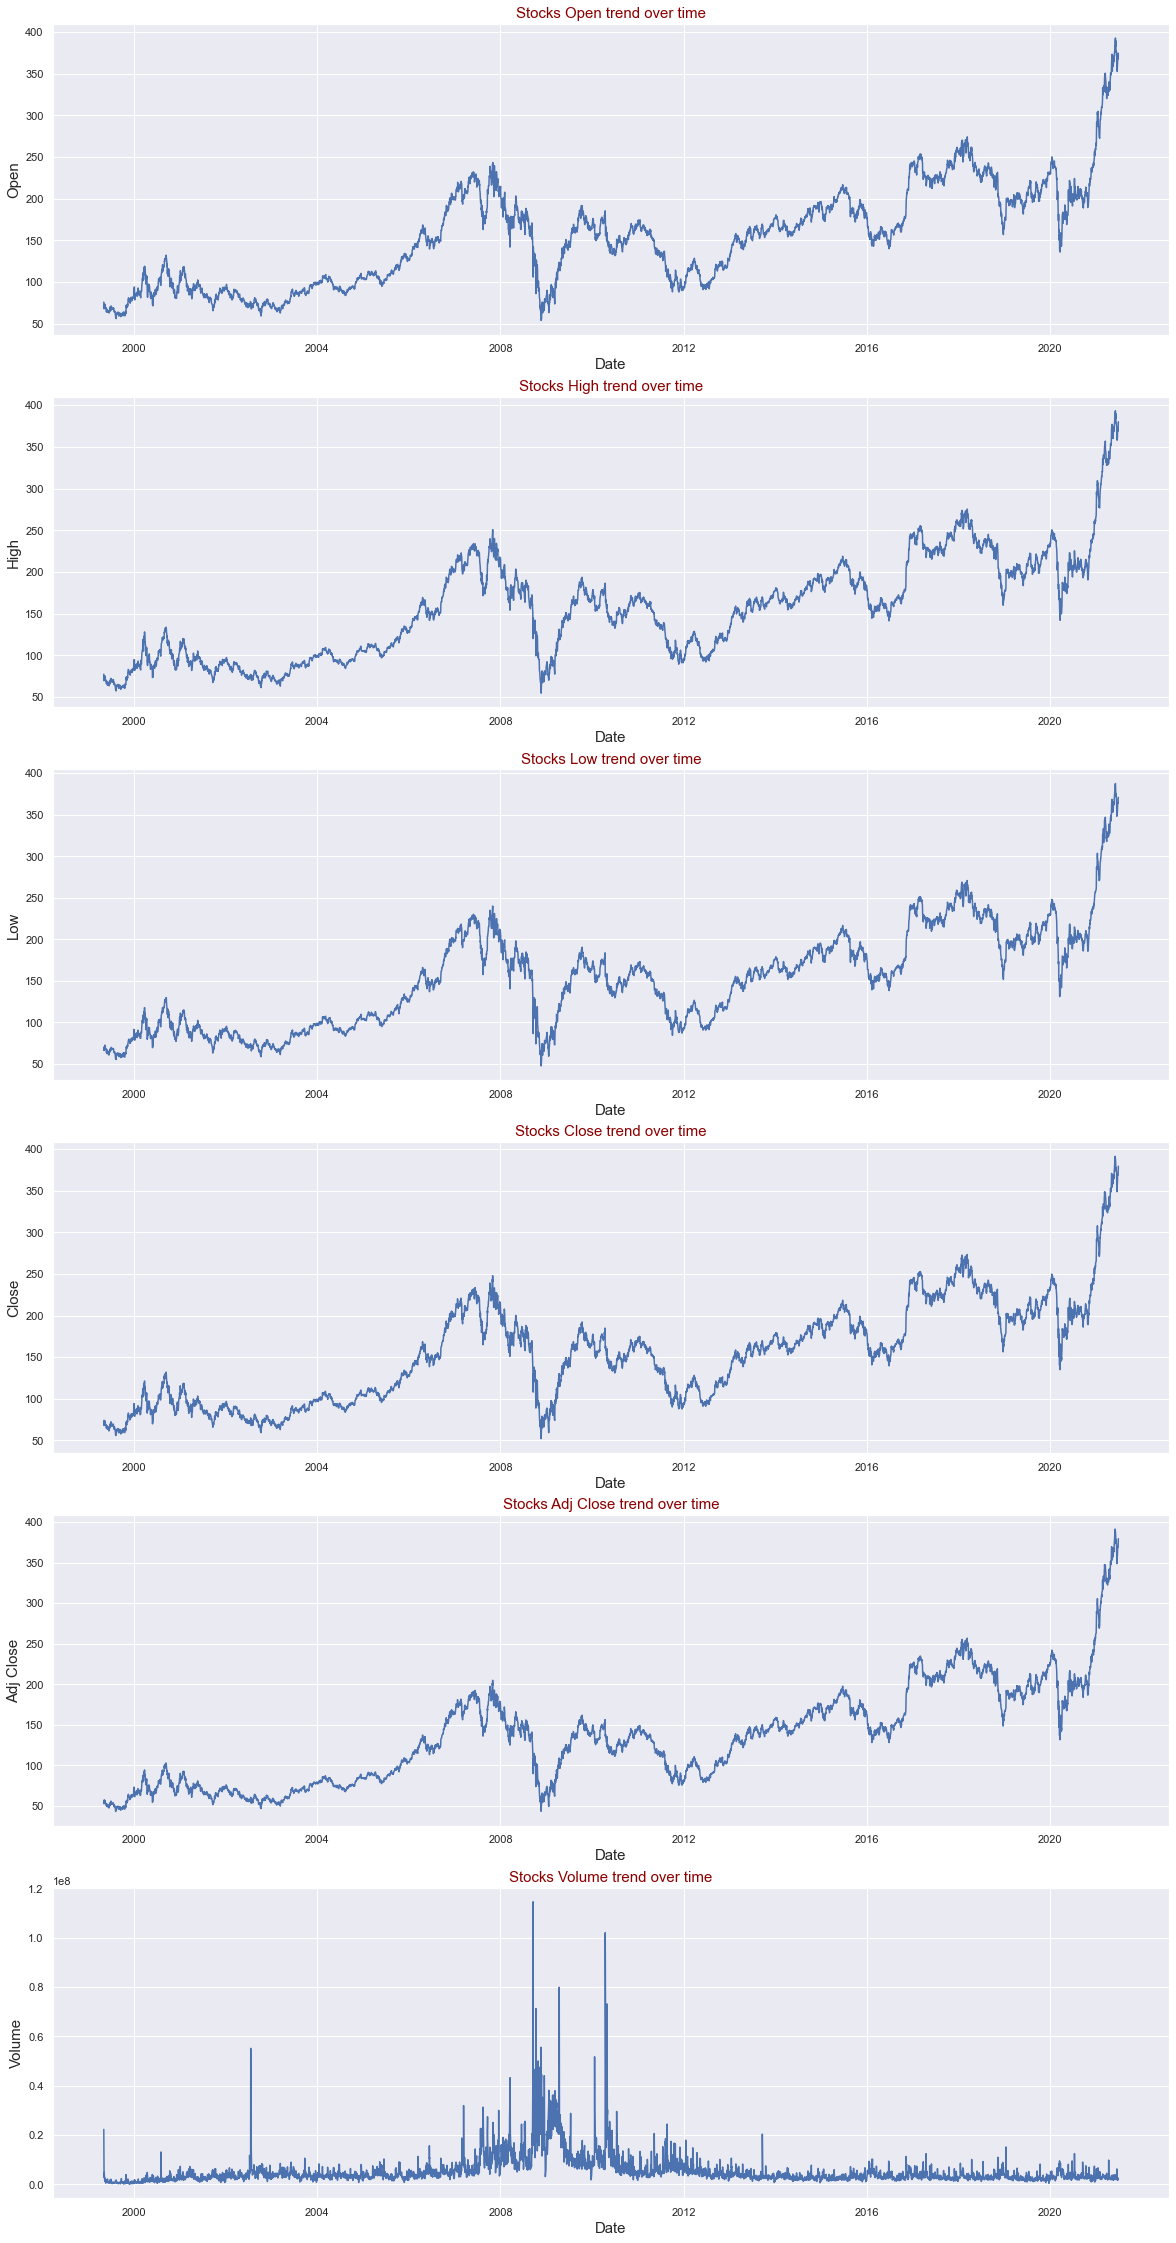

In [73]:
RP=plt.figure(figsize=(20,40))
for a,i in enumerate(['Open','High','Low','Close','Adj Close','Volume']):
    r=RP.add_subplot(6,1,a+1)
    plt.plot(Stocks_data['Date'],Stocks_data[i])
    r.set_title('Stocks '+i+' trend over time',fontsize=15,color='DarkRed')
    r.set_xlabel('Date',fontsize=15)
    r.set_ylabel(i,fontsize=15)

All the trends are irregular trends.

In [74]:
Stocks_data['Year'] = pd.DatetimeIndex(Stocks_data['Date']).year
Stocks_data['Month'] = pd.DatetimeIndex(Stocks_data['Date']).month
print(Stocks_data)

           Date        Open        High         Low       Close   Adj Close  \
1    1999-05-04   76.000000   77.250000   70.000000   70.375000   54.440052   
2    1999-05-05   69.875000   69.875000   66.250000   69.125000   53.473076   
3    1999-05-06   68.000000   69.375000   67.062500   67.937500   52.554470   
4    1999-05-07   67.937500   74.875000   66.750000   74.125000   57.340931   
5    1999-05-10   73.375000   73.500000   70.250000   70.687500   54.681774   
...         ...         ...         ...         ...         ...         ...   
5573 2021-06-24  363.000000  370.880005  362.779999  368.750000  368.750000   
5574 2021-06-25  368.820007  371.149994  364.540009  368.769989  368.769989   
5575 2021-06-28  367.799988  368.869995  363.859985  368.709991  368.709991   
5576 2021-06-29  374.859985  378.089996  370.750000  372.619995  372.619995   
5577 2021-06-30  370.899994  380.109985  370.899994  379.529999  379.529999   

        Volume  Year  Month  
1     22320900  1999 

In [75]:
Stocks_data.groupby('Year').count()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
Year,,,,,,,,
1999,169,169,169,169,169,169,169,169
2000,252,252,252,252,252,252,252,252
2001,248,248,248,248,248,248,248,248
2002,252,252,252,252,252,252,252,252
2003,252,252,252,252,252,252,252,252
2004,252,252,252,252,252,252,252,252
2005,252,252,252,252,252,252,252,252
2006,251,251,251,251,251,251,251,251
2007,251,251,251,251,251,251,251,251


In [76]:
Stocks_data.Year.unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021], dtype=int64)

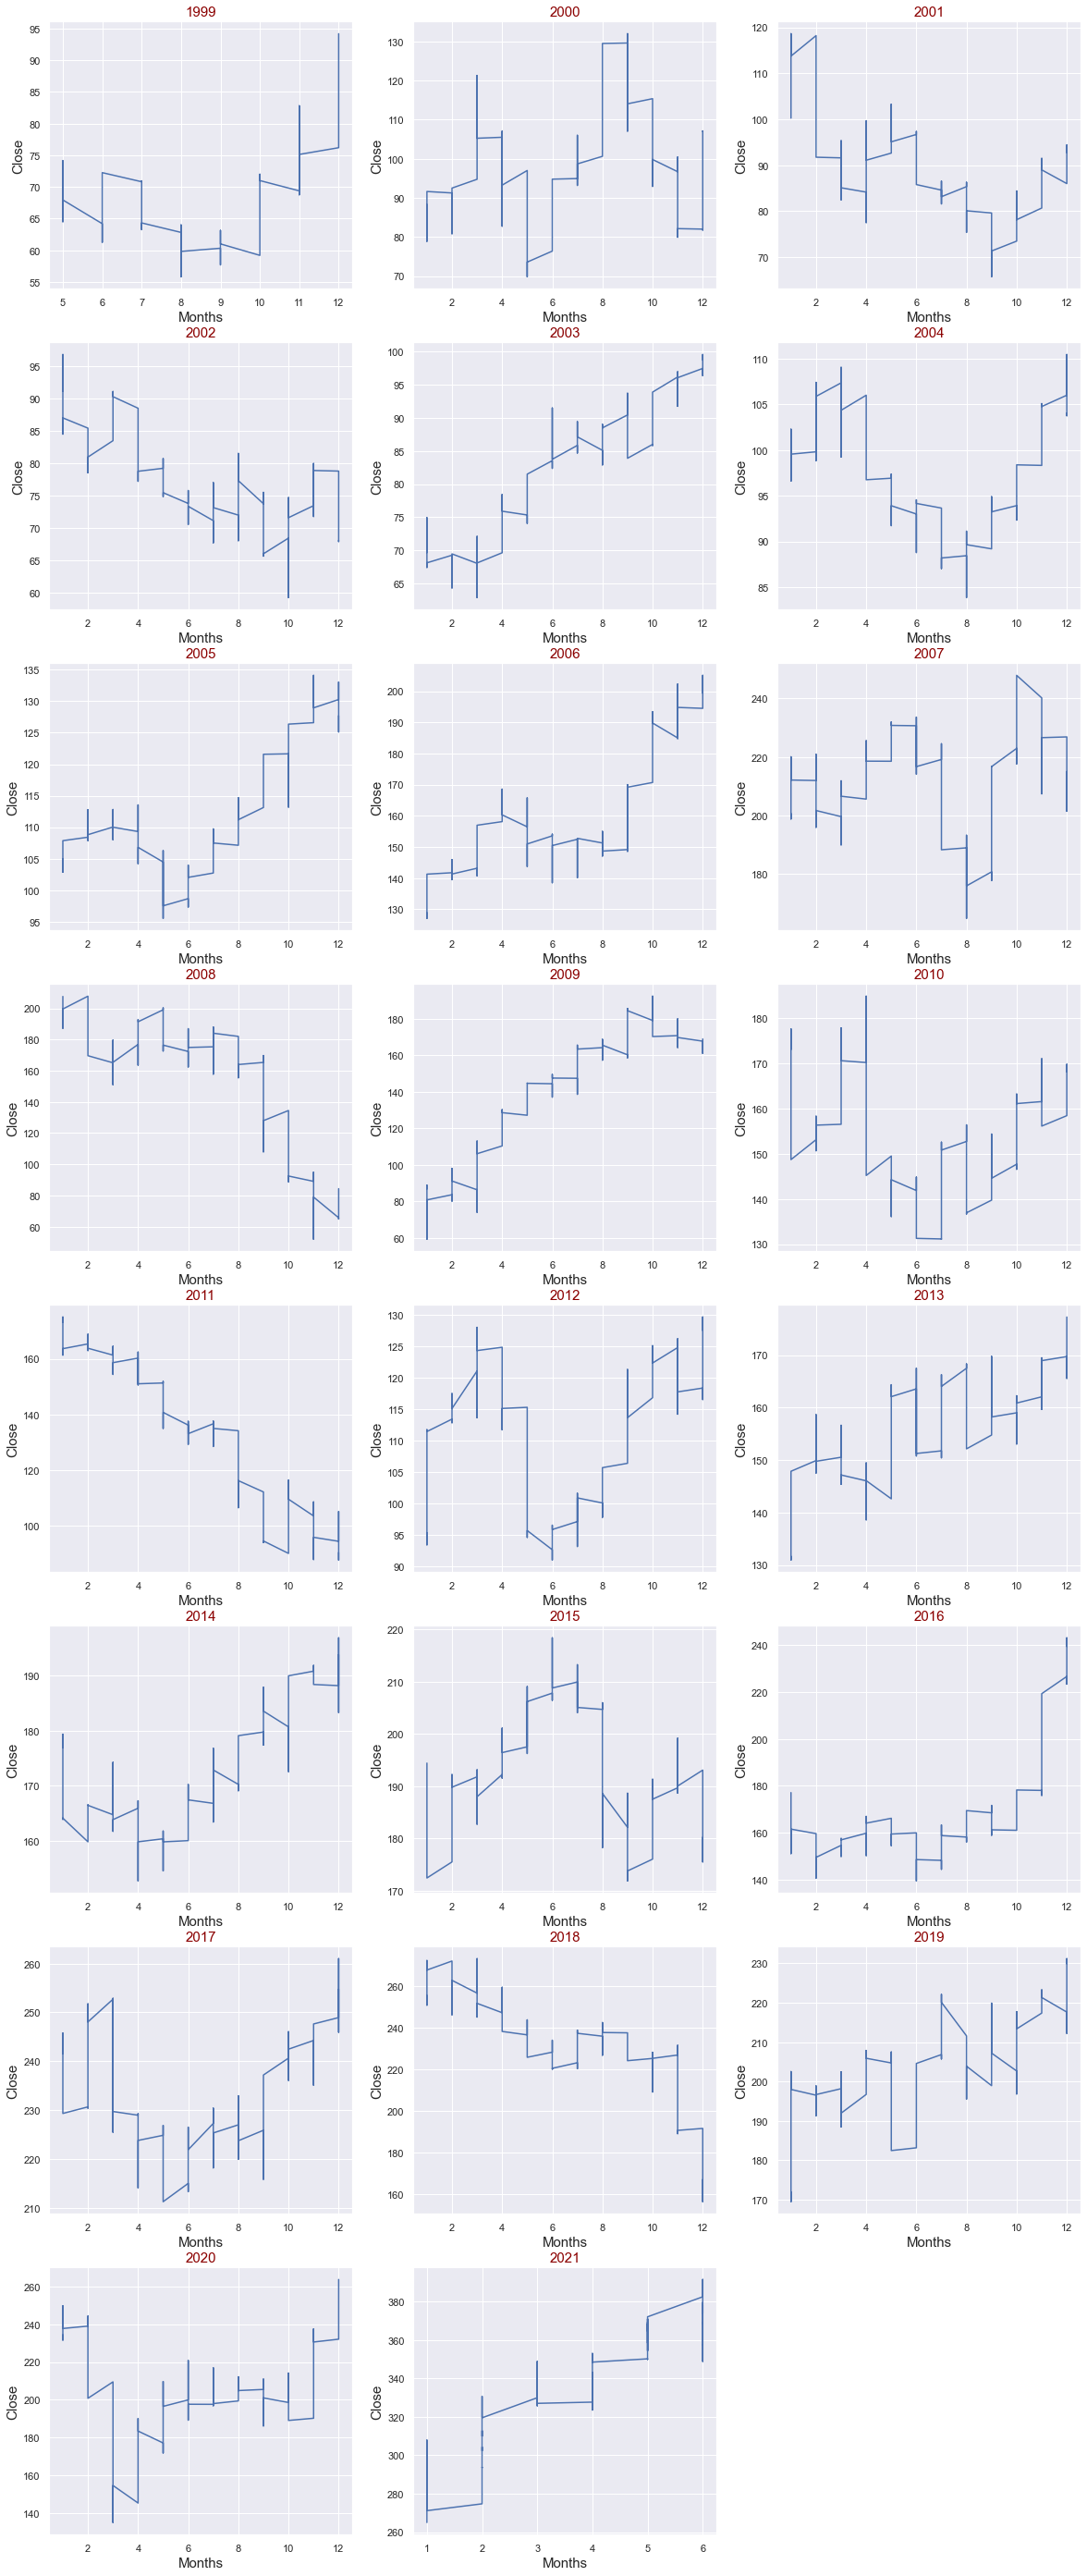

In [77]:
RP=plt.figure(figsize=(20,50))
for a,i in enumerate(Stocks_data.Year.unique()):
    r=RP.add_subplot(8,3,a+1)
    P=Stocks_data.loc[Stocks_data['Year']==i,['Close','Month']]
    plt.plot(P['Month'],P['Close'])
    r.set_title(i,fontsize=15,color='DarkRed')
    r.set_xlabel('Months',fontsize=15)
    r.set_ylabel('Close',fontsize=15)

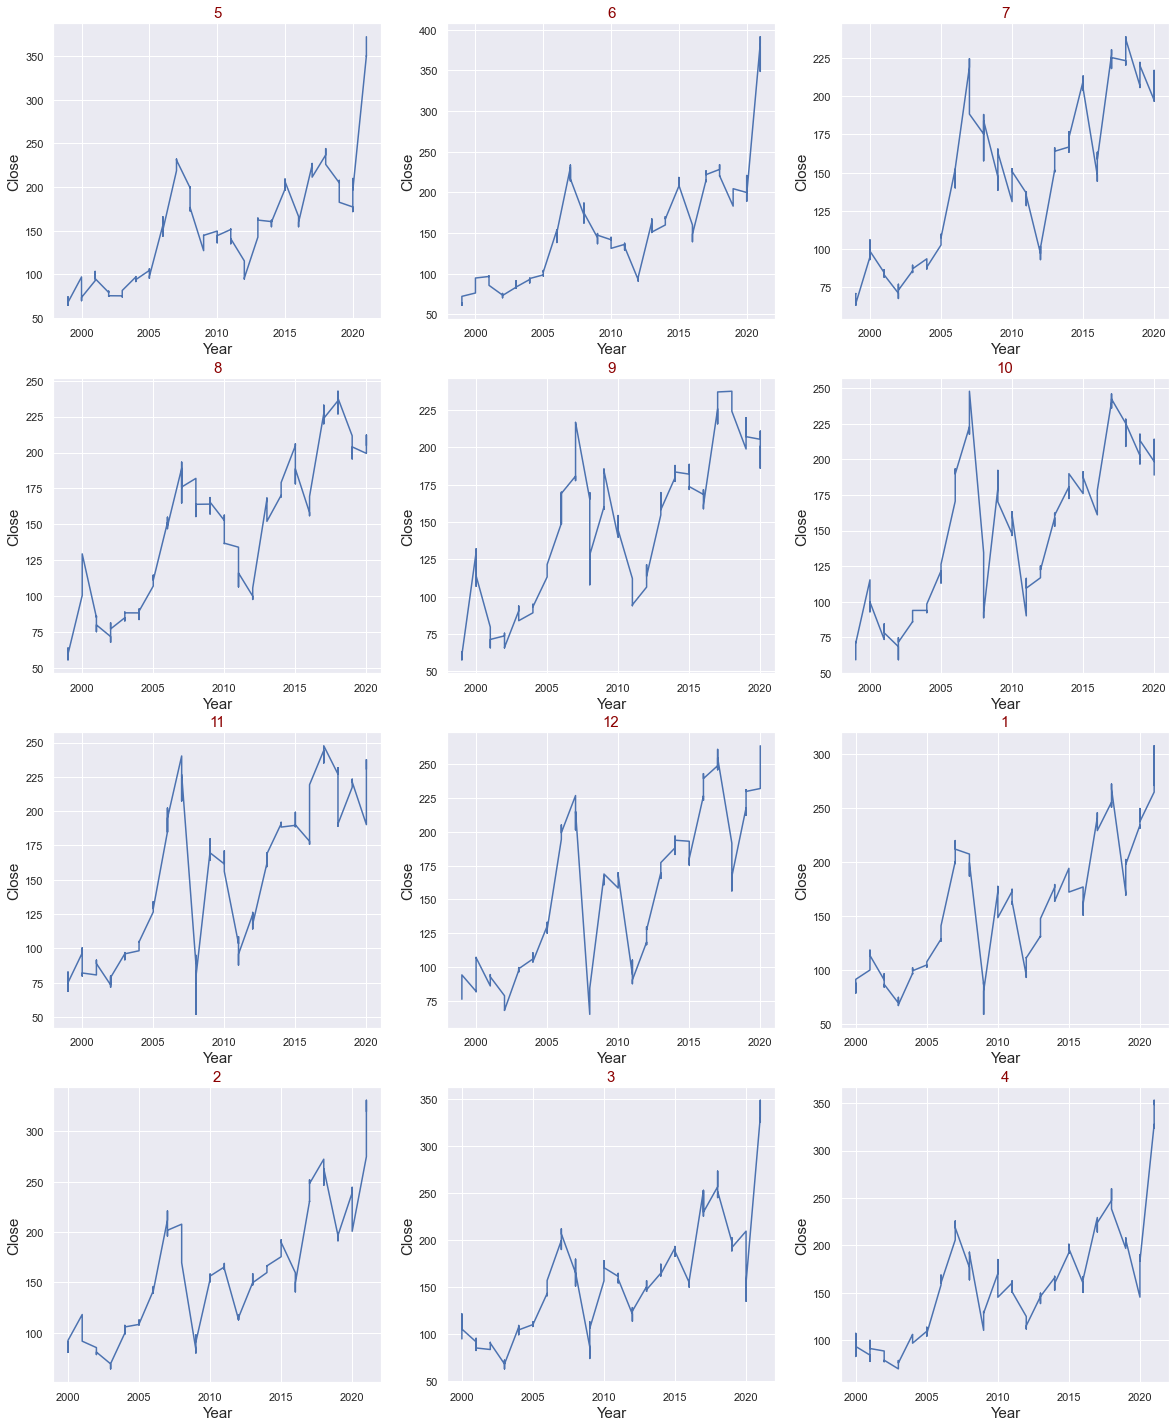

In [78]:
RP=plt.figure(figsize=(20,25))
for a,i in enumerate(Stocks_data.Month.unique()):
    r=RP.add_subplot(4,3,a+1)
    P=Stocks_data.loc[Stocks_data['Month']==i,['Close','Year']]
    plt.plot(P['Year'],P['Close'])
    r.set_title(i,fontsize=15,color='DarkRed')
    r.set_xlabel('Year',fontsize=15)
    r.set_ylabel('Close',fontsize=15)

(array([ 728., 1307.,  697., 1251.,  864.,  544.,   75.,   24.,   49.,
          38.]),
 array([ 52.       ,  85.9450012, 119.8900024, 153.8350036, 187.7800048,
        221.725006 , 255.6700072, 289.6150084, 323.5600096, 357.5050108,
        391.450012 ]),
 <a list of 10 Patch objects>)

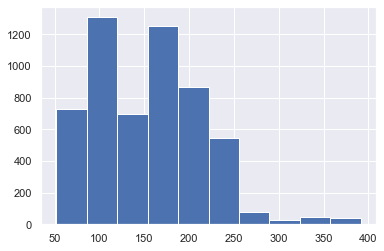

In [79]:
plt.hist(Stocks_data['Close'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022208D189D0>,
      dtype=object)

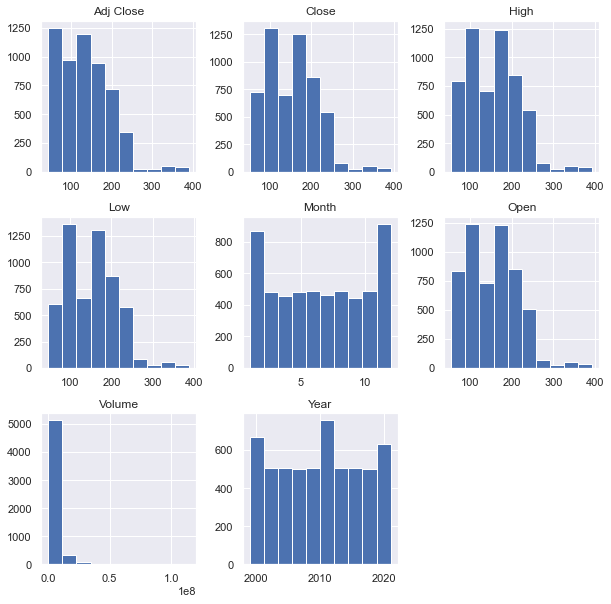

In [80]:
Stocks_data.hist(figsize=(10,10))

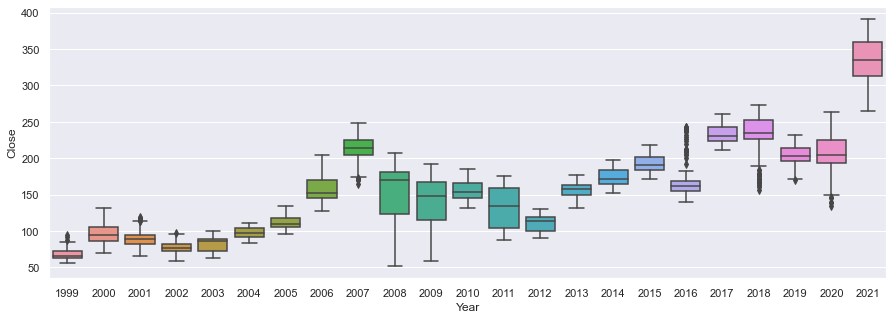

In [81]:
plt.figure(figsize=(15,5))
sns.boxplot(Stocks_data['Year'],Stocks_data['Close'])

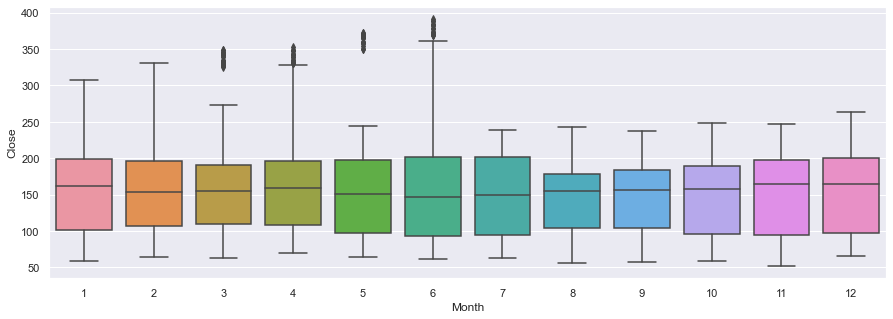

In [82]:
plt.figure(figsize=(15,5))
sns.boxplot(Stocks_data['Month'],Stocks_data['Close'])

### Moving Average

In [87]:
def plot_moving_average(series, window, plot_intervals=True, scale=1.96):

    rolling_mean = series.rolling(window=window).mean() #To find mean of datas by takings bits of length as window.
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'r', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'g--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'g--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')

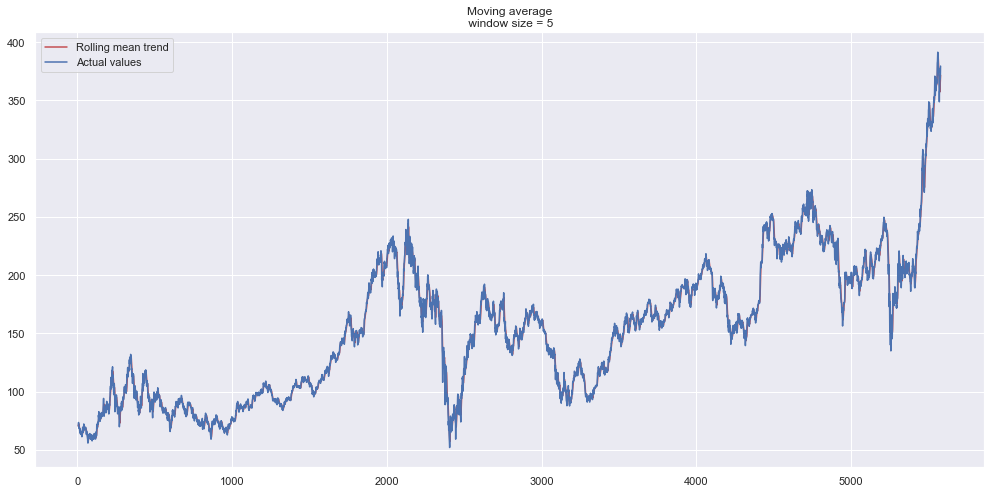

In [91]:
plot_moving_average(Stocks_data['Close'],5,False)

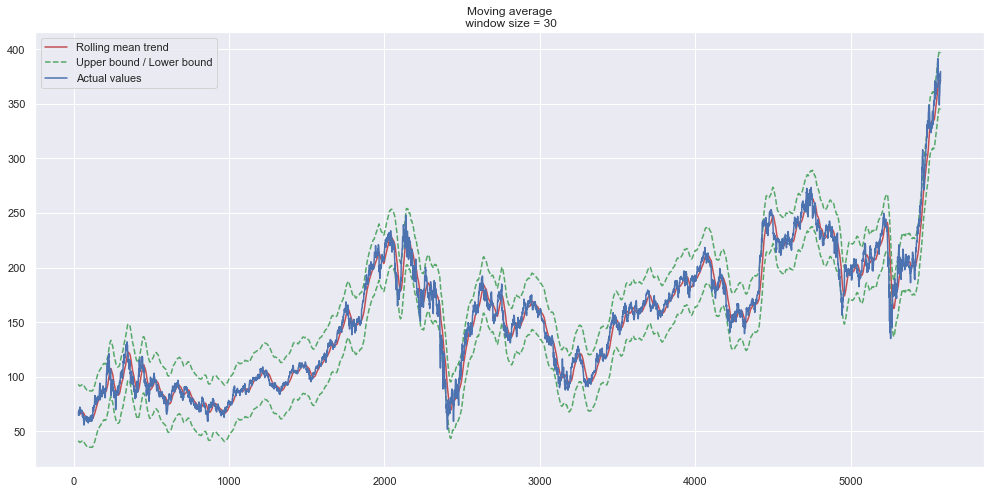

In [89]:
plot_moving_average(Stocks_data['Close'],30)

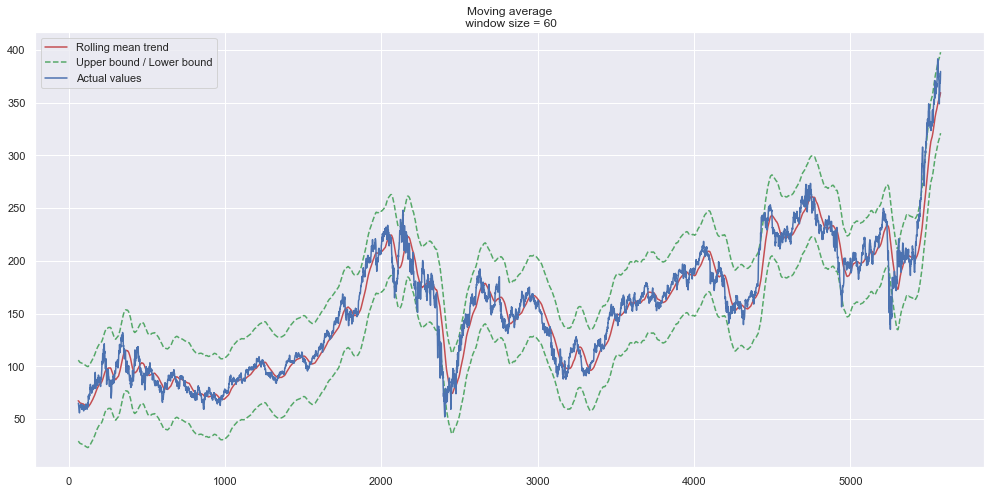

In [90]:
plot_moving_average(Stocks_data['Close'],60)

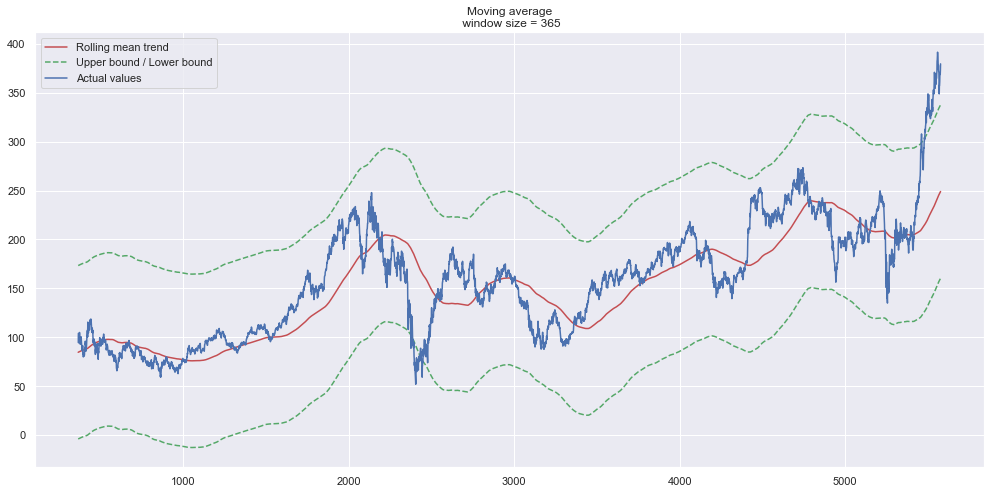

In [92]:
plot_moving_average(Stocks_data['Close'],365)